In [7]:
import pandas as pd

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

In [11]:
df = df[df.trip_type == 2]

In [12]:
df['duration']= df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [13]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [17]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [18]:
df[categorical] = df[categorical].astype(str)

In [20]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

In [22]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [23]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1836 stored elements and shape (612, 239)>

In [25]:
target = 'duration'
y_train = df[target].values

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_10320/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_10320/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


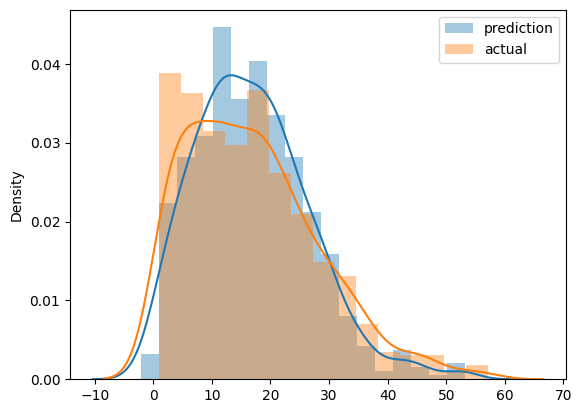

In [31]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [35]:
mean_squared_error(y_train, y_pred)

33.020020794202914